<a href="https://colab.research.google.com/github/MohammadDeep/pian-file-public/blob/main/2_get_label_pain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read file saved_x_norm,y_norm.pkl
file_path1 = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/saved_x_norm,y_norm.pkl'
#save file saved_list_pain.pkl
file_path = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/saved_list_pain.pkl'

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU is available. Using CUDA...")
else:
  device = torch.device("cpu")
  print("GPU is not available. Using CPU...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")









GPU is available. Using CUDA...
Device: cuda
Mounted at /content/drive


In [ ]:
# prompt: read fiile '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/saved_x_norm,y_norm.pkl'

import pickle




try:
  with open(file_path1, 'rb') as f:
    data = pickle.load(f)
    print('read ')  # Or process the loaded data as needed
except FileNotFoundError:
  print(f"File not found: {file_path1}")
except Exception as e:
  print(f"Error loading file: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
read 


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
x_norm,y_norm = data

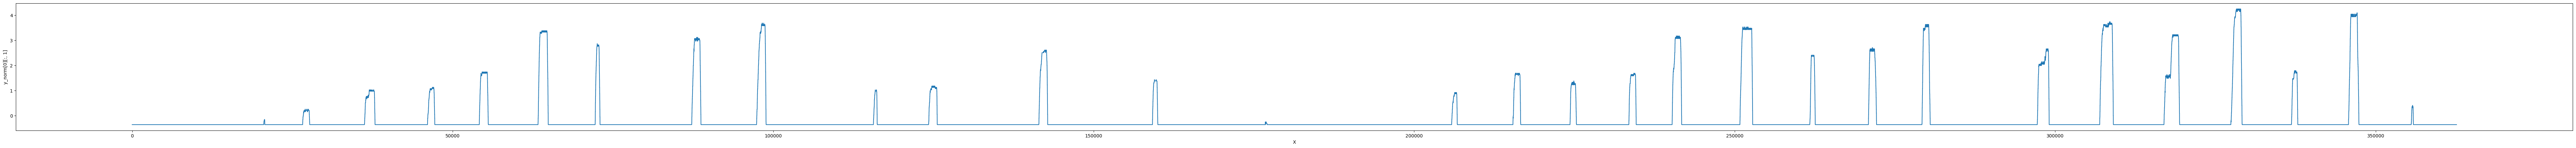

In [ ]:
# prompt: plot y_norm[0][:, 1] figsize show x numberes

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 5))  # Adjust the figure size as needed
plt.plot(y_norm[0][:, 1].cpu())
plt.xlabel("X")
plt.ylabel("y_norm[0][:, 1]")
plt.show()


In [ ]:
def pain_window(signal1):
  signal = signal1[:, 1]
  len_signal = signal.shape[0]

  min_signal = float(min(signal[:]))
  new_signal = torch.full((len_signal,), min_signal,device = device)
  list_index = []
  n = 0
  n_start = 0
  n_len = 0

  for i in range(0,len_signal, 10):
    #new_signal.append(min_signal)
    if signal[i] > min_signal :

      if n == 0:
        n_start = i

      n = 1
    else:
      if n == 1:
        n_end = i-1
        list_index.append((n_start,n_end))

      n = 0

  for start,end in list_index:
    max_local = float( signal1[start:end, 1].max())

    new_signal[start:end] = max_local


  return new_signal, list_index

In [ ]:
list_pain =[]
list_index = []
u = 1
for i in y_norm:
  print(f'persion : {u} / 52')
  u += 1
  pain,index = pain_window(i)
  list_pain.append(pain)
  list_index.append(index)


persion : 1 / 52
persion : 2 / 52
persion : 3 / 52
persion : 4 / 52
persion : 5 / 52
persion : 6 / 52
persion : 7 / 52
persion : 8 / 52
persion : 9 / 52
persion : 10 / 52
persion : 11 / 52
persion : 12 / 52
persion : 13 / 52
persion : 14 / 52
persion : 15 / 52
persion : 16 / 52
persion : 17 / 52
persion : 18 / 52
persion : 19 / 52
persion : 20 / 52
persion : 21 / 52
persion : 22 / 52
persion : 23 / 52
persion : 24 / 52
persion : 25 / 52
persion : 26 / 52
persion : 27 / 52
persion : 28 / 52
persion : 29 / 52
persion : 30 / 52
persion : 31 / 52
persion : 32 / 52
persion : 33 / 52
persion : 34 / 52
persion : 35 / 52
persion : 36 / 52
persion : 37 / 52
persion : 38 / 52
persion : 39 / 52
persion : 40 / 52
persion : 41 / 52
persion : 42 / 52
persion : 43 / 52
persion : 44 / 52
persion : 45 / 52
persion : 46 / 52
persion : 47 / 52
persion : 48 / 52
persion : 49 / 52
persion : 50 / 52
persion : 51 / 52
persion : 52 / 52


In [ ]:
# prompt: save list_pain

import pickle

# Assuming 'list_pain' is defined in your code as described in the provided code snippet



try:
  with open(file_path, 'wb') as f:
    pickle.dump(list_pain, f)
    print(f"list_pain saved to: {file_path}")
except Exception as e:
  print(f"Error saving list_pain: {e}")


list_pain saved to: /content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/saved_list_pain.pkl


In [ ]:
float( y_norm[0][[1,2], 1].max())

-0.35112202167510986

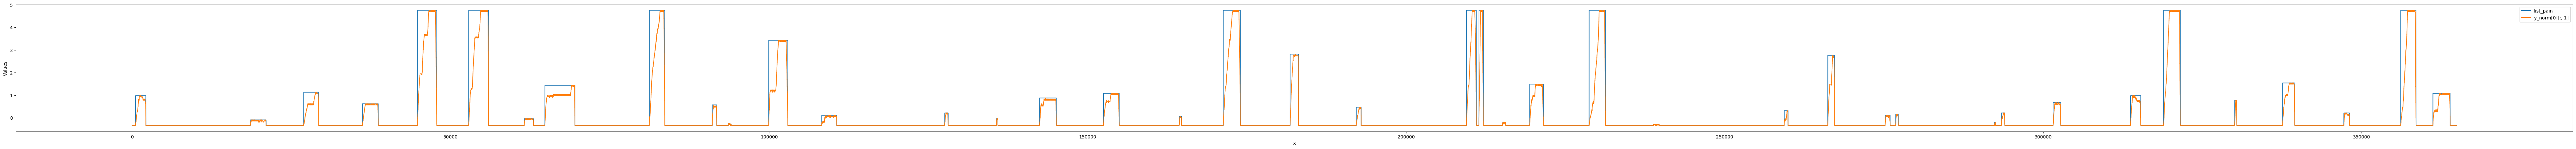

In [ ]:
# prompt: plot list_pain and y_norm[0][:, 1]
presion = 10
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 5))  # Adjust the figure size as needed
plt.plot(list_pain[presion].cpu(), label='list_pain')
plt.plot(y_norm[presion][:, 1].cpu(), label='y_norm[0][:, 1]')
plt.xlabel("X")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
list_len_index = []
for i in list_index:
  for k,j in i:
    list_len_index.append(j - k)

In [ ]:
import numpy as np
max(list_len_index), min(list_len_index), float(np.mean(list_len_index)),float(np.std(list_len_index))

(28249, 9, 1088.322528363047, 1414.145037147501)

In [ ]:
# prompt: sort list_len_index

list_len_index_sorted = sorted(list_len_index)
len(list_len_index_sorted),list_len_index_sorted[0],list_len_index_sorted[-1]

(3085, 9, 28249)

In [ ]:
list_number_index = []
window_len = 1000
for i in list_len_index_sorted:
  list_number_index.append(int(i // window_len))
max_index = max(list_number_index) + 1
n_number_list = [0] * max_index
for i in list_number_index:
  n_number_list[i] += 1

In [ ]:
dic_list = {}
for i in range(len(n_number_list)):
  dic_list[f'[{i*window_len, (i+1)*window_len}]'] = n_number_list[i]

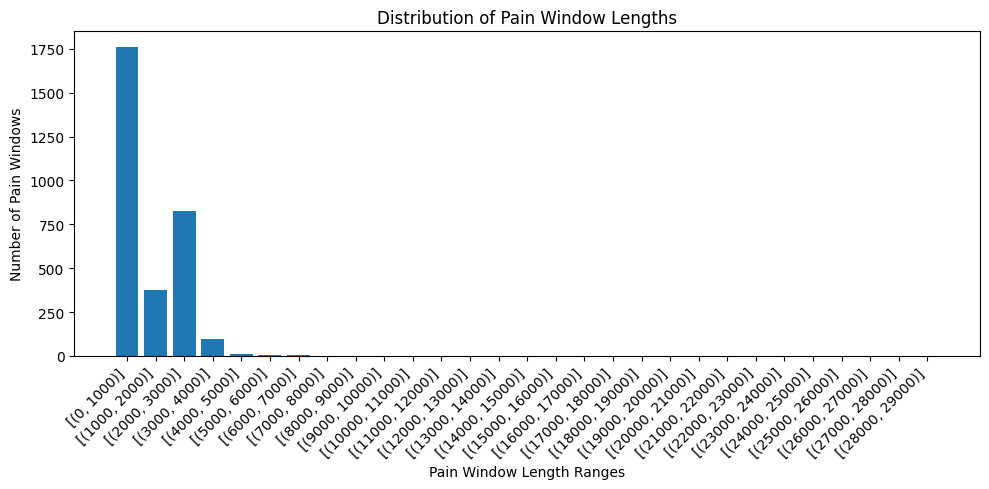

In [ ]:
# prompt: نمودار میله ای dic_list

import matplotlib.pyplot as plt

# Assuming dic_list is defined as in your code snippet

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.bar(dic_list.keys(), dic_list.values())
plt.xlabel("Pain Window Length Ranges")
plt.ylabel("Number of Pain Windows")
plt.title("Distribution of Pain Window Lengths")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
